<a href="https://colab.research.google.com/github/matbar97/Machine-learning---classification-of-peptidome-to-5-classes/blob/main/Project_UMB_Machine_learning_Peptidome_classification_5_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inicjalizacja modułu daal4py w celu przyspieszenia biblioteki sklearn


In [ ]:
pip install daal4py

     |████████████████████████████████| 11.8MB 237kB/s 
     |████████████████████████████████| 171.6MB 30kB/s 
     |████████████████████████████████| 277.5MB 54kB/s 
     |████████████████████████████████| 169.0MB 79kB/s 
     |████████████████████████████████| 31.6MB 104kB/s 
     |████████████████████████████████| 3.9MB 14.7MB/s 


In [ ]:
from daal4py.sklearn import patch_sklearn
patch_sklearn()

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


# Wczytanie bibliotek

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsOneClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy import interp
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['Leukemia'] = "/content/gdrive/My Drive/Leukemia/"

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Leukemia/

/content/gdrive/.shortcut-targets-by-id/1nEil2hhcUun6MRJov1PyfabYxYFFvELE/Leukemia


# Pierwsza wersja - leukemia_500

In [ ]:
df = pd.read_csv('leukemia_500.csv', sep=';')
print(df.head(), df.shape)

                      Column1   Column2   Column3  ...  Column71 Column72 Column73
0               #Leukemia_500   ALLB 01   ALLB 04  ...    AML 64   AML 65   AML 66
1  #ALL B-cell#ALL T-cell#AML         1         1  ...         3        3        3
2                   M23197_at   8.02791   8.16993  ...  11.10591  9.12928  8.41363
3              U05259_rna1_at  13.18704  12.37558  ...  10.06340  8.23362  9.28309
4                   X03934_at   9.28309   8.88874  ...   8.84549  8.43879  8.73132

[5 rows x 73 columns] (502, 73)


In [ ]:
X, y = np.transpose(df.iloc[2:, 1:]), (df.iloc[1, 1:])
print(X); print(X.shape)
X = np.array(X)
print(X, X.shape)
print(np.transpose(y), y.shape)

               2         3        4    ...      499       500      501
Column2    8.02791  13.18704  9.28309  ...  9.36632   9.10852  8.48382
Column3    8.16993  12.37558  8.88874  ...  8.96290   8.39232  7.76818
Column4    8.62571  12.38640  8.43045  ...  9.79604   9.40301  7.53916
Column5    6.39232  12.32924  9.09540  ...  5.04439   8.44708  7.16993
Column6    7.97154  11.98299  9.60548  ...  7.52356   8.25267  7.38370
...            ...       ...      ...  ...      ...       ...      ...
Column69  10.64836  10.76653  8.96578  ...  7.97728   9.59991  6.14975
Column70  10.87882   8.45533  8.78790  ...  9.16993   9.52552  6.24793
Column71  11.10591  10.06340  8.84549  ...  6.54935  10.22882  6.89482
Column72   9.12928   8.23362  8.43879  ...  7.82018   8.75822  6.05486
Column73   8.41363   9.28309  8.73132  ...  9.86109   9.00843  5.61471

[72 rows x 500 columns]
(72, 500)
[['8.02791' '13.18704' '9.28309' ... '9.36632' '9.10852' '8.48382']
 ['8.16993' '12.37558' '8.88874' ... '8.96290

In [ ]:
y = np.array(y)
print(y, y.shape)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3'] (72,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.

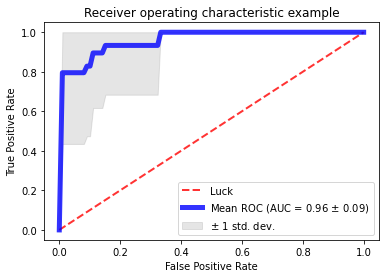

In [ ]:
### MULTICLASS CV
lw = 5
kf = StratifiedKFold(n_splits = 5, shuffle=False)
params = {
    'C': [0.05, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}
clf = (MLPClassifier())

classes = np.unique(y)
y_true = label_binarize(y, classes=classes)
n_classes = y_true.shape[1]

base_fpr = np.linspace(0, 1, 100)
colors = ['darksalmon', 'gold', 'royalblue', 'mediumseagreen', 'violet']
fprs = []
tprs = []
roc_aucs = []
accs = []
cross_val_accs = []

fff=[]
ttt=[]
aucc=[]
# Fit the model for each fold
for i, (train, test) in enumerate(kf.split(X,y)):
  X_train, X_test = X[train], X[test]
  y_train, y_test = y[train], y_true[test]

  model = clf.fit(X_train, y_train)
  
  y_score = model.predict_proba(X_test)
  preds = model.predict(X_test)

  # Compute ROC curve and ROC area for each class PER FOLD
  for j in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, j], y_score[:, j])
    # roc_auc = auc(fpr, tpr)
    tprs.append(interp(base_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(base_fpr, mean_tpr)
std_auc = np.std(roc_aucs)
plt.plot(base_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=lw, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Funkcje obsługujące przeszukiwanie siatki parametrów dla klasyfikatorów + ROC

## Funkcja ROC - AUC

In [ ]:
print("\n------ Plotting MULTI-CLASS ROC Curve --------\n")
def plot_MULTI_CLASS_roc(X_train,X_test,y_train,y_test, classifier,
                            n_classes, class_labels):
    lw = 1.5
    # Binarize the multiclass predictions, for ROC curve plotting purposes
    y_train_binarized = label_binarize(y_train, classes=class_labels)
    y_test_binarized = label_binarize(y_test, classes=class_labels)
    # print(y_train_binarized)
    # print(y_test_binarized)
    y_bin_score = classifier.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()
    for cl in range(n_classes):
        fpr[cl], tpr[cl], thresholds[cl] = roc_curve(y_test_binarized[:, cl], y_bin_score[:, cl])
        roc_auc[cl] = auc(fpr[cl], tpr[cl])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_bin_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    # First aggregate all false positive rates

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(1, figsize=(8, 8))
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(class_labels[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.005, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()


------ Plotting MULTI-CLASS ROC Curve --------



## SVM z GridSearch

In [ ]:
def make_classification_with_GRID_(svc, model_name, X_train, y_train, X_test, y_test):
    '''
    use selected classifier to perform classification
    '''
    param = {
      'C': np.logspace(-5, 4, 10),
      "kernel": ["linear", "poly","rbf"],
      "degree":[1, 2, 3, 4, 5],
      "decision_function_shape" : ['ovo', 'ovr'],
      "gamma": np.logspace(-5,0,5)
      
      }
    # GridSearchCV for hyperparameters optimization
    gcv = GridSearchCV(svc, param, verbose=3,cv=5)
    gcv.fit(X_train, y_train)

    print('\n',gcv.best_params_)
    gcv = gcv.best_estimator_

    y_pred = gcv.predict(X_test)
    labels = np.unique(y_train)
    scores = cross_val_score(gcv, X_test, y_test, cv=5)
    print('Accuracy score: ', accuracy_score(y_test, y_pred))
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))    
    print(classification_report(y_test, y_pred, target_names=labels))
    plot_MULTI_CLASS_roc(X_train, X_test, y_train, y_test, gcv, 3, np.unique(y_test))
    return gcv

## MLP z GridSearch

In [ ]:
def make_classification_MLP_with_GRID_(mlp, model_name, X_train, y_train, X_test, y_test):
  '''
  use selected classifier to perform classification
  '''
  param = {
    'solver': ['sgd', 'adam'],
    'alpha': 10.0 ** -np.arange(1, 4),
    'learning_rate': ["constant", "adaptive"],
    'hidden_layer_sizes':[(20,5),(50,),(80,),(100,),(120,),(140)],    # 'alpha': [10.0 ** -np.arange(1, 7)],
    'activation': ["relu", "sigmoid"]
  }
  # GridSearchCV for hyperparameters optimization
  gcv = GridSearchCV(mlp, param, cv=5, verbose=3)
  gcv.fit(X_train, y_train)
  print("\n Best params: ", gcv.best_params_)
  gcv = gcv.best_estimator_
  y_pred = gcv.predict(X_test)
  labels = np.unique(y_train)
  scores = cross_val_score(gcv, X_test, y_test, cv=5)
  print('Accuracy score: ', accuracy_score(y_test, y_pred))
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))    
  print(classification_report(y_test, y_pred, target_names=labels))
  plot_MULTI_CLASS_roc(X_train, X_test, y_train, y_test, gcv, 3, np.unique(y_test))
  return gcv

## KNN z GridSearch

In [ ]:
def make_classification_KNearestNeighbours_with_GRID_(knn, model_name, X_train, y_train, X_test, y_test):
  '''
  use selected classifier to perform classification
  '''
  param = {
    'n_neighbors': (1,2,5,10,20),
    'leaf_size': (1,5,10,20,40),
    'p': (1,2,3),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
    }
  # GridSearchCV for hyperparameters optimization
  gcv = GridSearchCV(knn, param, cv=5, verbose=3)
  gcv.fit(X_train, y_train)
  print('\n',gcv.best_params_)
  gcv = gcv.best_estimator_
  y_pred = gcv.predict(X_test)
  labels = np.unique(y_train)
  scores = cross_val_score(gcv, X_test, y_test, cv=5)
  print('Accuracy score: ', accuracy_score(y_test, y_pred))
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))    
  print(classification_report(y_test, y_pred, target_names=labels))
  plot_MULTI_CLASS_roc(X_train, X_test, y_train, y_test, gcv, 3, np.unique(y_test))
  return gcv

## DecisionTree z GridSearch

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def make_classification_DecisionTree_with_GRID_(dtc, model_name, X_train, y_train, X_test, y_test):
  '''
  use selected classifier to perform classification
  '''
  param = {
    'ccp_alpha': np.logspace(-5,-1,6), 
    'max_depth': [20, 50, 100, None], 
    'max_features': ['auto', 'log2'], 
    'min_samples_leaf': [1,2,3,4,5],
    }
  # GridSearchCV for hyperparameters optimization
  gcv = GridSearchCV(dtc, param, cv=5, verbose = 2)
  gcv.fit(X_train, y_train)
  gcv = gcv.best_estimator_
  y_pred = gcv.predict(X_test)
  labels = np.unique(y_train)
  scores = cross_val_score(gcv, X_test, y_test, cv=5)
  print('Accuracy score: ', accuracy_score(y_test, y_pred))
  print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))    
  print(classification_report(y_test, y_pred, target_names=labels))
  plot_MULTI_CLASS_roc(X_train, X_test, y_train, y_test, gcv, 3, np.unique(y_test))
  return gcv

## RandomForest z GridSearch

In [ ]:
def make_classification_RandomForest_with_GRID_(svc, model_name, X_train, y_train, X_test, y_test):
    '''
    use selected classifier to perform classification
    '''
    param = {
        'n_estimators':[500,800,1000],
        'max_features':['auto',None,'log2'],
        'max_depth':[50,100,150],
        'min_samples_split':[2,5,10,15],
        'min_samples_leaf':[1,2,5,10]

      }
    # GridSearchCV for hyperparameters optimization
    gcv = GridSearchCV(svc, param, verbose=3)
    gcv.fit(X_train, y_train)
    print('\n',gcv.best_params_)
    gcv = gcv.best_estimator_

    y_pred = gcv.predict(X_test)
    labels = np.unique(y_train)
    scores = cross_val_score(gcv, X_test, y_test, cv=5)
    print('Accuracy score: ', accuracy_score(y_test, y_pred))
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))    
    print(classification_report(y_test, y_pred, target_names=labels))
    plot_MULTI_CLASS_roc(X_train, X_test, y_train, y_test, gcv, 3, np.unique(y_test))
    return gcv

## Funkcja treningowa bez parametrów

In [ ]:
def make_classification(clf, model_name, X_train, y_train, X_test, y_test):
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    labels = np.unique(y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    print('Accuracy score: ', accuracy_score(y_test, y_pred))
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))    
    print(classification_report(y_test, y_pred, target_names=labels))
    plot_MULTI_CLASS_roc(X_train, X_test, y_train, y_test, clf, 3, np.unique(y_test))
    return clf

# Podział na dane treningowe/testowe - leukemia_500

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=np.random.RandomState(0))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(48, 500) (24, 500) (48,) (24,)


In [ ]:
print(y); print(y.shape)
y = np.array(y)
print(y); print(y.shape)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3']
(72,)
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3']
(72,)


# Treningi z optymalizacją

## Support Vector Classifier

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
[CV] C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear 
[CV]  C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear, score=0.600, total=   0.0s
[CV] C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear 
[CV]  C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear, score=0.600, total=   0.0s
[CV] C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear 
[CV]  C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear, score=0.500, total=   0.0s
[CV] C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear 
[CV]  C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear, score=0.556, total=   0.0s
[CV] C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear 
[CV]  C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear, score=0.556,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=rbf 
[CV]  C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=rbf, score=0.500, total=   0.0s
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=rbf 
[CV]  C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=rbf, score=0.556, total=   0.0s
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=rbf 
[CV]  C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=rbf, score=0.556, total=   0.0s
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=linear 
[CV]  C=10.0, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=linear, score=1.000, total=   0.0s
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=1.0, kernel=linear 
[CV]  C=10.0, decision_function_shape=ovr, 

[Parallel(n_jobs=1)]: Done 7500 out of 7500 | elapsed:  1.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


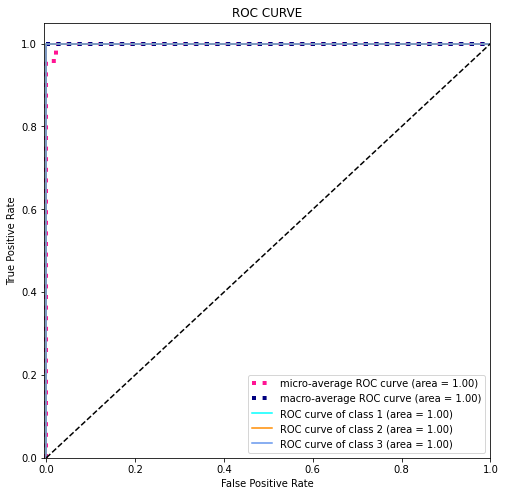

In [ ]:
svm = make_classification_with_GRID_(SVC(probability=True), 'SVM model', X_train, y_train, X_test, y_test)

## RandomForestClassifier

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.900, total=   0.1s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=1.000, total=   0.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.900, total=   0.1s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=1.000, total=   0.1s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.889, total=   0.1s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.900, total=   0.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=1.000, total=   0.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.900, t

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed: 11.6min finished



 {'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score:  0.9583333333333334
0.92 accuracy with a standard deviation of 0.10
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         3
           3       1.00      0.90      0.95        10

    accuracy                           0.96        24
   macro avg       0.97      0.97      0.97        24
weighted avg       0.96      0.96      0.96        24



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


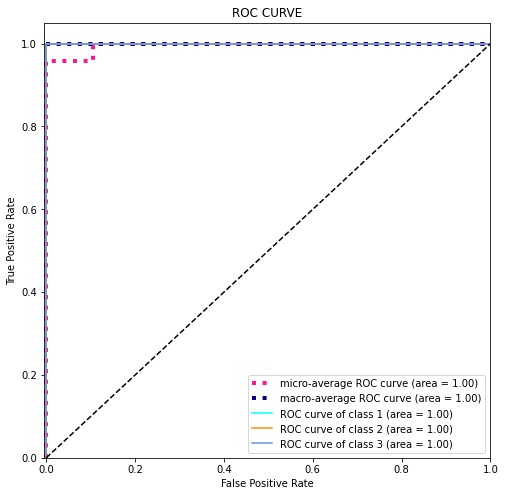

In [ ]:
rfc = make_classification_RandomForest_with_GRID_(RandomForestClassifier(), 'RFClassifier', X_train, y_train, X_test, y_test)

## Multi-Layer Perceptron

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.300, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.778, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.556, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.600, total=   0.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.700, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.333, total=   0.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.111, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.600, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.200, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.556, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.778, total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.300, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.800, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.556, total=   0.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.333, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.600, total=   0.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.889, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.778, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.889, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.800, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.889, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.556, total=   0.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.500, total=   0.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.889, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.889, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.889, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.900, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.600, total=   0.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.889, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.889, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.100, total

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=1.000, total=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.889, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.889, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.889, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.800, total=   0.0s
[CV

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.900, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.7s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=1.000, total=   0.7s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.900, total=   0.8s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.889, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=1.000, total=   0.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.700, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.889, total=   0.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.700, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.889, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.600, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.556, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.778, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.800, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.333, total=   0.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.444, total=   0.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.889, total=   0.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.556, total=   0

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.889, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.700, total=   0.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.900, total= 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.778, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.889, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.889, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.900, t

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=1.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.700, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.500, total=   0.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=0.700, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=0.800, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=1.000, total=   0.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=0.667, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.500, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam, score=1.000, total=   0.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam, score=0.600, total=   0.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam, score=0.333, total=   0.1s
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.778, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.700, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.700, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.889, total=   0.1s
[CV] a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.800, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.333, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.667, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.800, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.556, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.500, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.667, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.300, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.111, total=   0.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.556, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=1.000, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.889, total=   0.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.60

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.889, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.600, total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.667, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.889, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=1.000, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.667, 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.600, total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.889, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.500, total=   0.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=ada

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.900, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=ad

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.900, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.889, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, sco

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.900, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.889, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=ada

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.500, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=1.000, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.900, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=1.000, total=   0.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The activation 'sigmoid' is not supported. Supported activations are ['identity', 'logistic', 'relu', 'softmax', 'tanh'].

  FitFailedWarning)



[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=nan, total=   0.0s
[CV] activation=sigmoid, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=nan, total=   0.0s
[CV] activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=nan, total=   0.0s
[CV] activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=nan, total=   0.0s
[CV] activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=nan

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  2.3min finished



 Best params:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (80,), 'learning_rate': 'constant', 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score:  0.9583333333333334
0.92 accuracy with a standard deviation of 0.10
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         3
           3       1.00      0.90      0.95        10

    accuracy                           0.96        24
   macro avg       0.97      0.97      0.97        24
weighted avg       0.96      0.96      0.96        24



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


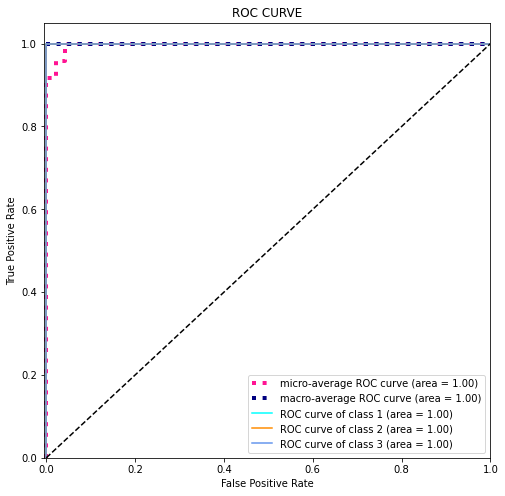

In [ ]:
mlp = make_classification_MLP_with_GRID_(MLPClassifier(), 'MLP', X_train, y_train, X_test, y_test)

## KNeighbours Classifier

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=di

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=3, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, metric=min

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   16.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


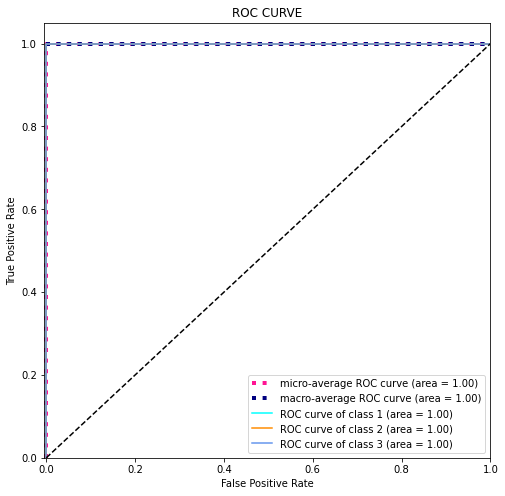

In [ ]:
knc = make_classification_KNearestNeighbours_with_GRID_(KNeighborsClassifier(), 'KNClasifier', X_train, y_train, X_test, y_test)

## DecisionTree Classifier

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=2 
[CV]  ccp_alpha=1e-05, max_depth=20,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=2, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=2 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=2, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=2 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=2, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=3 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=3 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=3 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=log2, min_samples_leaf=3 
[CV]  ccp_

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    7.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


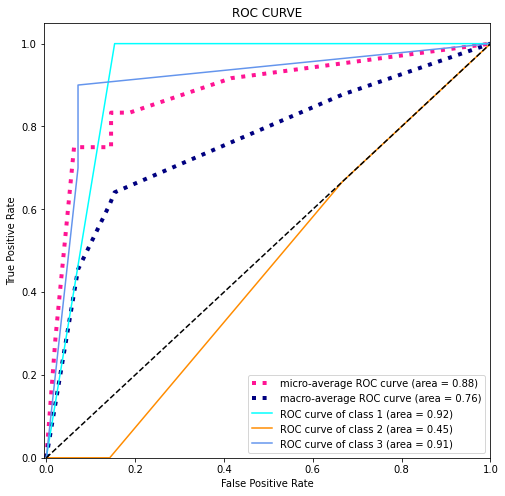

In [ ]:
dtc = make_classification_DecisionTree_with_GRID_(DecisionTreeClassifier(), 'DTClassifier', X_train, y_train, X_test, y_test)

# Bez optymalizacji

## SVM

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy score:  0.9583333333333334
0.88 accuracy with a standard deviation of 0.10
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         3
           3       1.00      0.90      0.95        10

    accuracy                           0.96        24
   macro avg       0.97      0.97      0.97        24
weighted avg       0.96      0.96      0.96        24



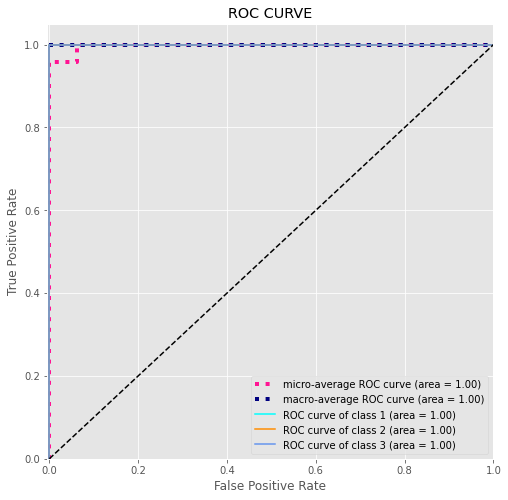

In [ ]:
SVM = make_classification(SVC(probability=True), 'SVM no param', X_train, y_train, X_test, y_test)

## MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score:  0.9583333333333334
1.00 accuracy with a standard deviation of 0.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.75      1.00      0.86         3
           3       1.00      0.90      0.95        10

    accuracy                           0.96        24
   macro avg       0.92      0.97      0.93        24
weighted avg       0.97      0.96      0.96        24



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


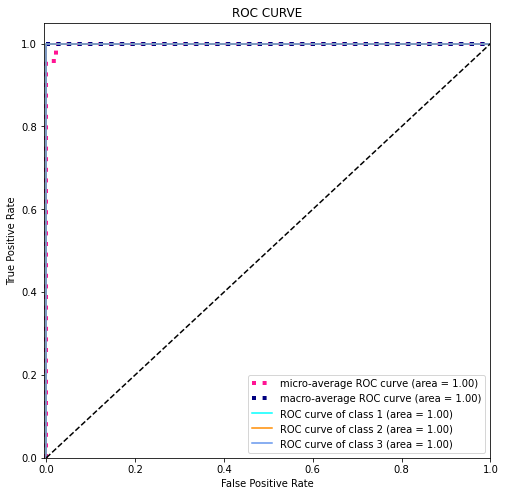

In [ ]:
MLP = make_classification(MLPClassifier(), 'MLP no param', X_train, y_train, X_test, y_test)

## KNC

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy score:  1.0
0.84 accuracy with a standard deviation of 0.15
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        10

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



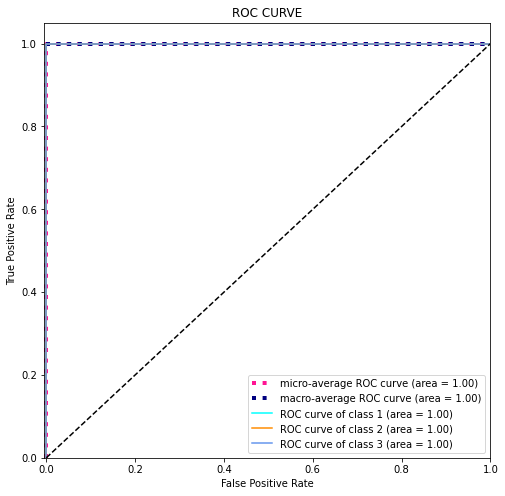

In [ ]:
KNN = make_classification(KNeighborsClassifier(), 'KNN no param', X_train, y_train, X_test, y_test)

## DTC

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy score:  0.8333333333333334
0.88 accuracy with a standard deviation of 0.16
              precision    recall  f1-score   support

           1       0.91      0.91      0.91        11
           2       0.50      1.00      0.67         3
           3       1.00      0.70      0.82        10

    accuracy                           0.83        24
   macro avg       0.80      0.87      0.80        24
weighted avg       0.90      0.83      0.84        24



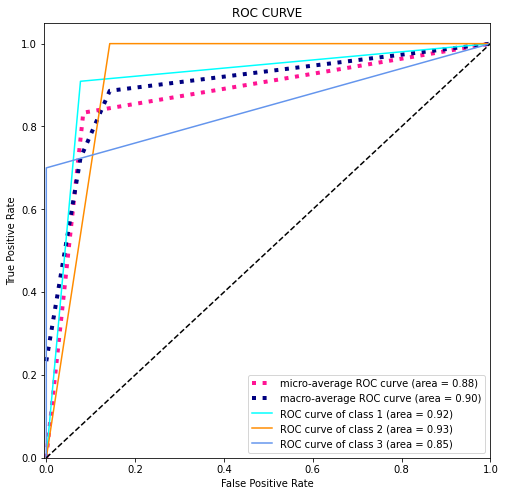

In [ ]:
DTC = make_classification(DecisionTreeClassifier(), 'DTC no param', X_train, y_train, X_test, y_test)

## RFC

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy score:  0.9583333333333334
0.88 accuracy with a standard deviation of 0.10
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         3
           3       1.00      0.90      0.95        10

    accuracy                           0.96        24
   macro avg       0.97      0.97      0.97        24
weighted avg       0.96      0.96      0.96        24



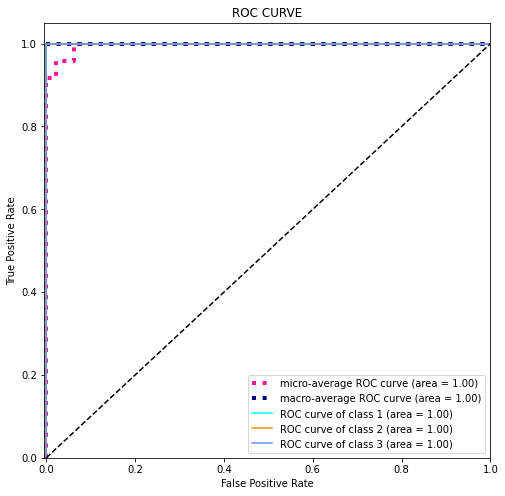

In [ ]:
RFC = make_classification(RandomForestClassifier(), 'RFC no param', X_train, y_train, X_test, y_test)

# Druga wersja - Leukemia_preprocessed

In [ ]:
del X,y, X_train, y_train, X_test, y_test

In [ ]:
df = pd.read_csv('leukemia_preprocessed.csv', sep=';')
print(df.head(), df.shape)

                      Column1  Column2  Column3  ... Column71 Column72 Column73
0      #Leukemia_preprocessed  ALLB 01  ALLB 04  ...   AML 64   AML 65   AML 66
1  #ALL B-cell#ALL T-cell#AML        1        1  ...        3        3        3
2                   A28102_at  7.23840  8.91886  ...  8.28077  8.30378  7.83289
3                 AB000115_at  8.13443  6.88264  ...  7.87652  6.71425  6.72792
4                 AB000220_at  5.16993  5.28540  ...  5.52356  6.70044  6.82018

[5 rows x 73 columns] (4118, 73)


In [ ]:
X, y = np.transpose(df.iloc[2:, 1:]), df.iloc[1, 1:]
print(X); print(X.shape)
X = np.array(X)
y = np.array(y)
print(y)

             2        3        4     ...      4115     4116      4117
Column2   7.23840  8.13443  5.16993  ...   9.63118  8.36194   7.57743
Column3   8.91886  6.88264  5.28540  ...   9.29232  7.40939   6.97728
Column4   6.88264  7.62205  5.28540  ...   7.96578  8.29462   5.80735
Column5   8.83920  7.39232  3.32193  ...  10.15482  8.91289   8.52748
Column6   9.76818  8.20945  5.88264  ...  10.81298  8.80090   9.60918
...           ...      ...      ...  ...       ...      ...       ...
Column69  8.54303  8.55842  3.74445  ...   9.10591  7.59991   8.56605
Column70  8.62571  8.38370  6.18982  ...   9.66000  8.79766   7.71425
Column71  8.28077  7.87652  5.52356  ...   8.86419  8.44708   8.14975
Column72  8.30378  6.71425  6.70044  ...   9.46557  8.46761   8.02237
Column73  7.83289  6.72792  6.82018  ...   8.72451  5.35755  10.79523

[72 rows x 4116 columns]
(72, 4116)
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '

# Podział na dane treningowe/testowe - leukemia_preprocessed

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=np.random.RandomState(0))
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(48, 4116) (24, 4116) (48,) (24,)


In [ ]:
print(y); print(y.shape)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3']
(72,)


# Treningi z optymalizacją

## Support Vector Classifier

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits
[CV] C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear 
[CV]  C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear, score=0.600, total=   0.1s
[CV] C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear 
[CV]  C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear, score=0.600, total=   0.1s
[CV] C=1e-05, decision_function_shape=ovo, degree=1, gamma=1e-05, kernel=linear 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=poly 
[CV]  C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=poly, score=1.000, total=   0.1s
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=poly 
[CV]  C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=poly, score=0.700, total=   0.1s
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=poly 
[CV]  C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=poly, score=1.000, total=   0.1s
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=poly 
[CV]  C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=poly, score=1.000, total=   0.1s
[CV] C=10.0, decision_function_shape=ovr, degree=2, gamma=0.05623413251903491, kernel=r

[Parallel(n_jobs=1)]: Done 7500 out of 7500 | elapsed: 11.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score:  0.9583333333333334
0.96 accuracy with a standard deviation of 0.08
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         3
           3       1.00      0.90      0.95        10

    accuracy                           0.96        24
   macro avg       0.97      0.97      0.97        24
weighted avg       0.96      0.96      0.96        24



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


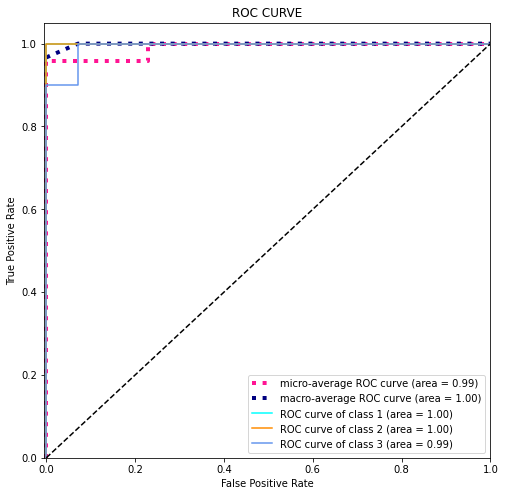

In [ ]:
svm_2 = make_classification_with_GRID_(SVC(probability = True), 'SVM model', X_train, y_train, X_test, y_test)

## Multi-Layer Perceptron

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.600, total=   1.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.600, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.300, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.333, total=   0.9s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.556, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.300, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.600, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.300, total=   0.9s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.500, total=   0.9s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.333, total=   0.4s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.556, total=   1.0s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.600, total=   1.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.300, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.300, total=   1.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.111, total=   0.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.333, total=   1.1s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.300, total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.100, total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.500, total=   0.2s
[CV] activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.1, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.333, total=   0.2s
[C

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.600, total=   0.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.600, total=   0.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.500, total=   1.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.556, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.556, total=   0.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.100, total=   1.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.100, total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.300, total=   1.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.111, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.111, total=   1.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.600, total=   0.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.100, total=   0.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.500, total=   0.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.556, total=   0.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.333, total=   0.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.600, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.100, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.500, total=   0.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=ada

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.333, total=   1.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.600, total=   1.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.600, total=   1.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.500, total=   1.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.444, total=   1.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.556, total=   1.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.600, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.100, total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.300, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.333, to

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.600, total=   1.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.600, total=   1.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.300, total=   0.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.556, total=   1.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.556, total=   1.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.300, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.300, total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.556, to

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.600, total=   2.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.600, total=   0.9s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.111, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.556, total=   2.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.300, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.600, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.300, total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.556, to

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.600, total=   2.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.500, total=   2.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.556, total=   2.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.556, total=   2.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.400, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.300, total=   0.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.333, to

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.600, total=   2.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.600, total=   2.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.600, total=   2.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.556, total=   2.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.556, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.500, total=   1.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.300, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.600, total=   2.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.300, total=   1.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.300, total=   1.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.556, total=   2.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.556, total=   2.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.800, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.300, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.600, total=   3.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.600, total=   3.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.500, total=   3.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.556, total=   3.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.556, total=   3.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=0.600, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=0.500, total=   1.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.600, total=   3.1s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.400, total=   1.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.556, total=   3.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.556, total=   3.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.100, total=   1.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.500, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.600, total=   3.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.600, total=   0.8s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.500, total=   3.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.556, total=   3.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.556, total=   3.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam, score=0.500, total=   0.4s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam, score=0.600, total=   1.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam, score=0.500, total=   1.2s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=constant, solver=adam, score=0.556, total=   0.9s
[CV] a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.600, total=   3.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.500, total=   3.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.556, total=   3.7s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.556, total=   3.6s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.300, total=   0.5s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.700, total=   1.0s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.300, total=   0.3s
[CV] activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.01, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.333, total=   0.8s
[CV] a

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.600, total=   1.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.600, total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.500, total=   0.9s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.556, total=   0.9s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=sgd, score=0.556, total=   0.9s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.600, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.100, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.500, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.333, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=constant, solver=adam, score=0.556, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd, score=0.600, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solve

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.333, total=   1.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(20, 5), learning_rate=adaptive, solver=adam, score=0.556, total=   0.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.600, total=   1.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.600, total=   1.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.500, total=   1.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.333, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd, score=0.556, total=   1.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.300, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.300, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=0.500, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam, score=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.900, total=   1.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.600, total=   1.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.300, total=   0.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.556, total=   1.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd, score=0.556, total=   1.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.100, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.500, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=0.500, total=   1.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam, score=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.500, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.600, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.500, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.111, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=sgd, score=0.556, total=   2.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.100, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.700, total=   0.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=0.500, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=constant, solver=adam, score=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.556, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=0.556, total=   2.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=0.500, total=   0.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.600, total=   2.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.500, total=   2.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.556, total=   2.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd, score=0.556, total=   2.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.300, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam, score=0.700, total=   0.9s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=constant, solver=ada

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.600, total=   2.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.500, total=   2.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.556, total=   2.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=sgd, score=0.556, total=   1.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam, score=0.300, total=   0.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=adaptive, solver=adam,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.600, total=   3.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.100, total=   0.8s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.500, total=   3.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.556, total=   3.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=sgd, score=0.111, total=   1.0s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=0.300, total=   0.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=constant, solver=adam,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.600, total=   3.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.500, total=   3.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.556, total=   3.2s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=sgd, score=0.556, total=   3.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.600, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam, score=0.500, total=   0.8s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=(120,), learning_rate=adaptive, solver=ada

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.600, total=   3.6s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.100, total=   0.4s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.400, total=   0.7s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.333, total=   0.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=constant, solver=sgd, score=0.333, total=   0.7s
[CV] 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.500, total=   3.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.333, total=   3.1s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=sgd, score=0.556, total=   1.3s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.900, total=   1.5s
[CV] activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.001, hidden_layer_sizes=140, learning_rate=adaptive, solver=adam, score=0.300, total=   0.3s
[

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The activation 'sigmoid' is not supported. Supported activations are ['identity', 'logistic', 'relu', 'softmax', 'tanh'].

  FitFailedWarning)


[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=nan, total=   0.0s
[CV] activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 
[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=nan, total=   0.0s
[CV] activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd 
[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=sgd, score=nan, total=   0.0s
[CV] activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=nan, total=   0.0s
[CV] activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam 
[CV]  activation=sigmoid, alpha=0.1, hidden_layer_sizes=(80,), learning_rate=adaptive, solver=adam, score=nan

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  6.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)



 Best params:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy score:  0.4583333333333333
0.46 accuracy with a standard deviation of 0.08
              precision    recall  f1-score   support

           1       0.46      1.00      0.63        11
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        10

    accuracy                           0.46        24
   macro avg       0.15      0.33      0.21        24
weighted avg       0.21      0.46      0.29        24



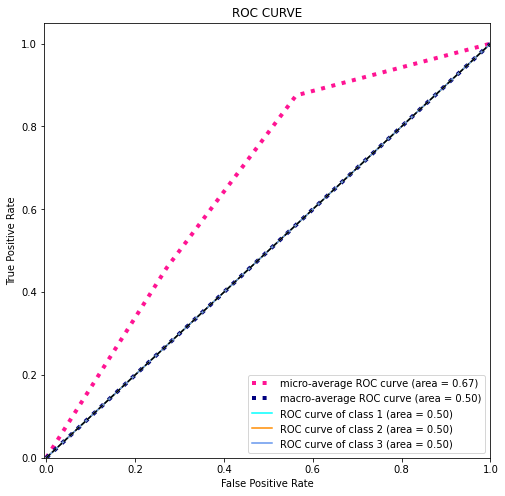

In [ ]:
mlp_2 = make_classification_MLP_with_GRID_(MLPClassifier(), 'MLP', X_train, y_train, X_test, y_test)

## K-Neighbors Classifier

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.1s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=1.000, total=   0.1s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=0.600, total=   0.1s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=1.000, total=   0.1s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=uniform, score=0.889, total=   0.1s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance, score=0.800, total=   0.1s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance, score=1.000, total=   0.1s
[CV] leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance 
[CV]  leaf_size=1, metric=minkowski, n_neighbors=1, p=1, weights=distance, score=0.600, total=   0.1s
[CV] leaf_size=1, metri

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.4min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score:  0.9166666666666666
0.86 accuracy with a standard deviation of 0.20
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       0.75      1.00      0.86         3
           3       1.00      0.80      0.89        10

    accuracy                           0.92        24
   macro avg       0.89      0.93      0.90        24
weighted avg       0.93      0.92      0.92        24



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


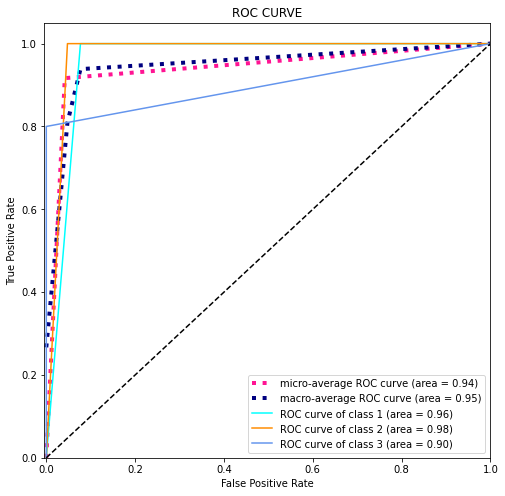

In [ ]:
knc_2 = make_classification_KNearestNeighbours_with_GRID_(KNeighborsClassifier(), 'KNNClasifier', X_train, y_train, X_test, y_test)

## DecisionTree Classifier

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=1, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=2 
[CV]  ccp_alpha=1e-05, max_depth=20,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=2, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=2 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=2, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=3 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=3 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=3 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=3 
[CV]  ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=3, total=   0.0s
[CV] ccp_alpha=1e-05, max_depth=20, max_features=auto, min_samples_leaf=3 
[CV]  ccp_

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   29.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy score:  0.8333333333333334
0.63 accuracy with a standard deviation of 0.26
              precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.67      0.67      0.67         3
           3       1.00      0.80      0.89        10

    accuracy                           0.83        24
   macro avg       0.81      0.79      0.80        24
weighted avg       0.85      0.83      0.84        24



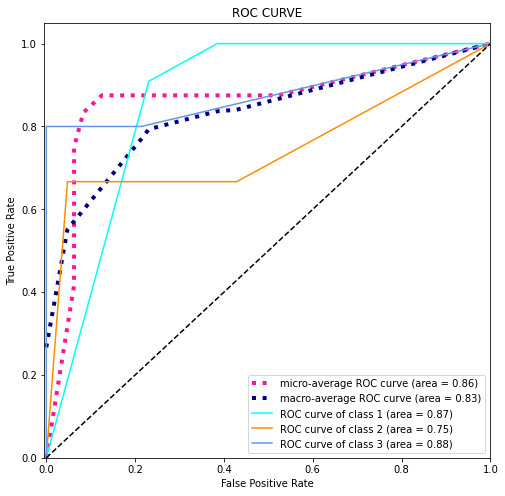

In [ ]:
dtc_2 = make_classification_DecisionTree_with_GRID_(DecisionTreeClassifier(), 'DTClassifier', X_train, y_train, X_test, y_test)

## Random Forest Classifier

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.900, total=   0.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=1.000, total=   0.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.700, total=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.889, total=   0.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, score=0.889, total=   0.2s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=0.900, total=   0.4s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800, score=1.000, total=   0.3s
[CV] max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed: 40.7min finished



 {'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score:  0.9166666666666666
0.80 accuracy with a standard deviation of 0.13
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        11
           2       1.00      0.67      0.80         3
           3       1.00      0.90      0.95        10

    accuracy                           0.92        24
   macro avg       0.95      0.86      0.89        24
weighted avg       0.93      0.92      0.91        24



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


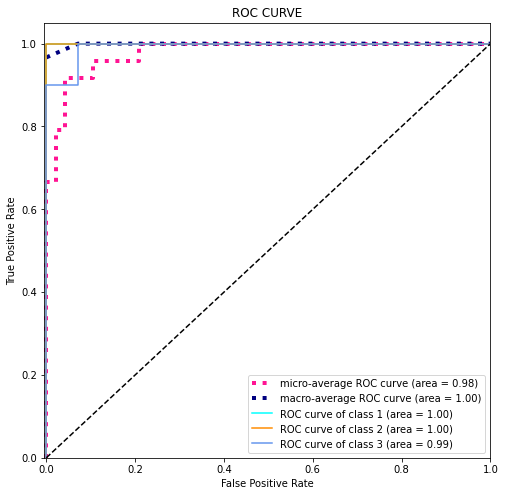

In [ ]:
rfc = make_classification_RandomForest_with_GRID_(RandomForestClassifier(), 'RFClassifier', X_train, y_train, X_test, y_test)

#Bez optymalizacji 2

## SVM

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy score:  0.75
0.75 accuracy with a standard deviation of 0.15
              precision    recall  f1-score   support

           1       0.65      1.00      0.79        11
           2       0.00      0.00      0.00         3
           3       1.00      0.70      0.82        10

    accuracy                           0.75        24
   macro avg       0.55      0.57      0.54        24
weighted avg       0.71      0.75      0.70        24



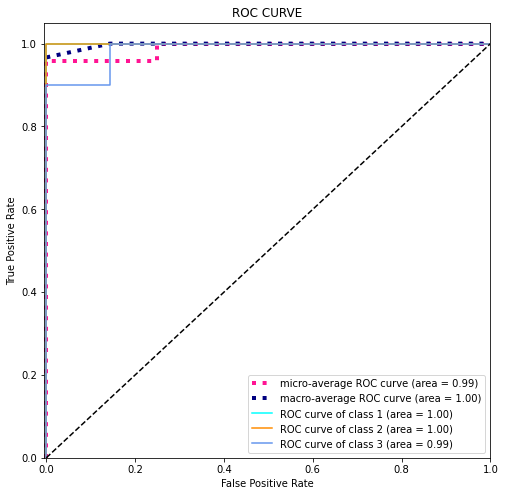

In [ ]:
SVM_2 = make_classification(SVC(probability=True), 'SVM no param', X_train, y_train, X_test, y_test)

## Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score:  0.8333333333333334
0.80 accuracy with a standard deviation of 0.13
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       1.00      0.33      0.50         3
           3       1.00      0.80      0.89        10

    accuracy                           0.83        24
   macro avg       0.91      0.71      0.75        24
weighted avg       0.88      0.83      0.82        24



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


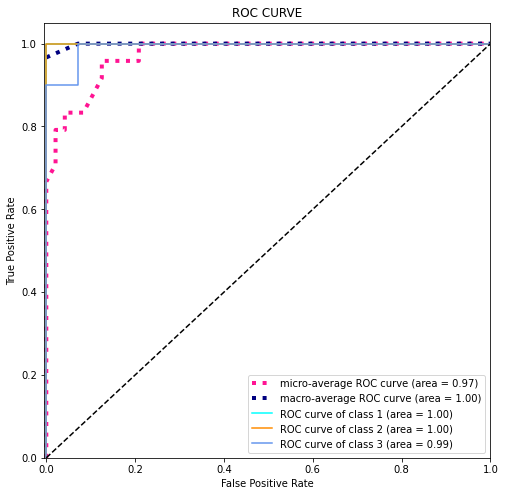

In [ ]:
RFC = make_classification(RandomForestClassifier(), 'RFC no param', X_train, y_train, X_test, y_test)

## Decision Tree Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy score:  0.9583333333333334
0.58 accuracy with a standard deviation of 0.13
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         3
           3       0.91      1.00      0.95        10

    accuracy                           0.96        24
   macro avg       0.97      0.97      0.97        24
weighted avg       0.96      0.96      0.96        24



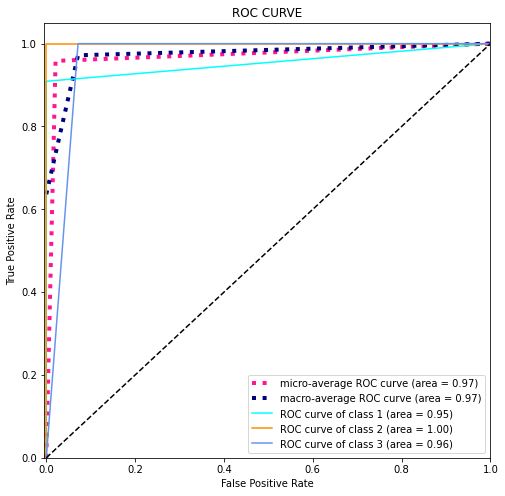

In [ ]:
DTC = make_classification(DecisionTreeClassifier(), 'DTC no param', X_train, y_train, X_test, y_test)

## K-Neighbors Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy score:  0.8333333333333334
0.79 accuracy with a standard deviation of 0.13
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       1.00      1.00      1.00         3
           3       1.00      0.60      0.75        10

    accuracy                           0.83        24
   macro avg       0.91      0.87      0.87        24
weighted avg       0.88      0.83      0.83        24



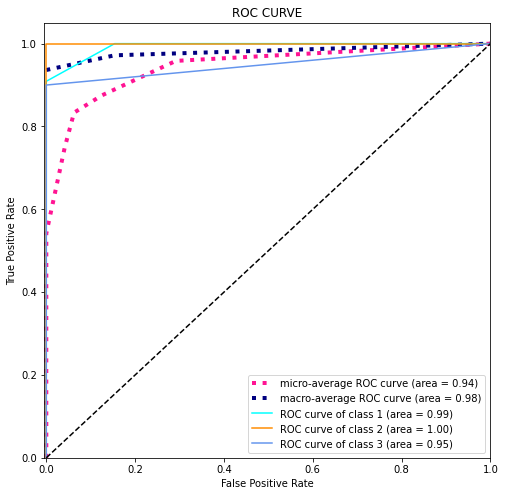

In [ ]:
KNN = make_classification(KNeighborsClassifier(), 'KNN no param', X_train, y_train, X_test, y_test)

## MLP Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy score:  0.4583333333333333
0.46 accuracy with a standard deviation of 0.20
              precision    recall  f1-score   support

           1       0.46      1.00      0.63        11
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        10

    accuracy                           0.46        24
   macro avg       0.15      0.33      0.21        24
weighted avg       0.21      0.46      0.29        24



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


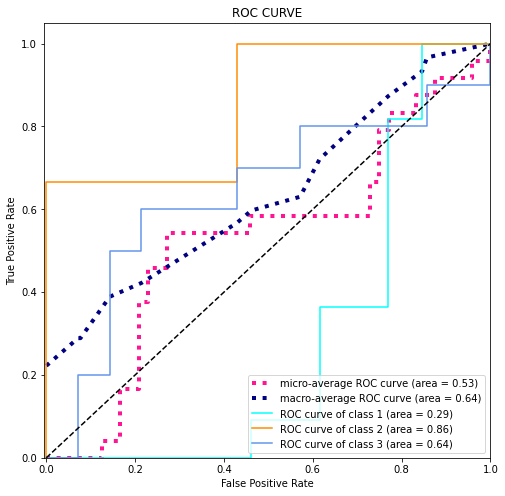

In [ ]:
MLP = make_classification(MLPClassifier(), 'MLP no param', X_train, y_train, X_test, y_test)